# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs), first introduced by Yann LeCun in 1989, are a specialized type of artificial neural network designed to process data with a known grid-like topology. This unique architecture makes CNNs particularly well-suited for handling structured data such as:

- **1-Dimensional Data**: Examples include time-series data, where data points are arranged sequentially at regular time intervals.
- **2-Dimensional Data**: The most common example is image data, which consists of pixels arranged in a grid of height and width.

## Why Convolutional Neural Networks?

The success of CNNs in various practical applications, especially in computer vision, stems from their ability to automatically and adaptively learn spatial hierarchies of features from input data. Unlike traditional neural networks that treat input data as flat vectors, CNNs exploit the spatial structure by using locally connected units that scan over the input data.

### Key Features of CNNs:

1. **Convolutional Layers**:
   - **Convolution Operation**: At the heart of CNNs lies the convolution operation, a mathematical process that applies a filter (or kernel) across the input data to produce feature maps. This operation captures local patterns such as edges, textures, and shapes in images.
   - **Parameter Sharing**: Convolutional layers utilize the same filter across different spatial locations, drastically reducing the number of parameters and computational complexity compared to fully connected layers.
   - **Translation Invariance**: By detecting features regardless of their position in the input, CNNs achieve a degree of invariance to translations, making them robust to shifts and distortions in the input data.

2. **Pooling Layers**:
   - **Dimensionality Reduction**: Pooling layers reduce the spatial dimensions (height and width) of the feature maps, which helps in decreasing the computational load and controlling overfitting.
   - **Types of Pooling**: Common pooling operations include max pooling (selecting the maximum value within a region) and average pooling (computing the average value).

3. **Activation Functions**:
   - **Non-Linearity**: Activation functions such as ReLU (Rectified Linear Unit) introduce non-linearity into the network, enabling it to learn complex patterns and representations.

4. **Fully Connected Layers**:
   - **High-Level Reasoning**: After several convolutional and pooling layers, fully connected layers interpret the extracted features to perform tasks like classification.

### Advantages of CNNs:

- **Automatic Feature Extraction**: CNNs automatically detect and learn relevant features from raw input data without the need for manual feature engineering.
- **Parameter Efficiency**: The use of convolutional and pooling layers reduces the number of parameters, making the network more efficient and less prone to overfitting.
- **Scalability**: CNNs can handle varying input sizes and complexities, making them versatile for different applications.

### Practical Applications:

- **Image and Video Recognition**: CNNs excel in tasks like object detection, facial recognition, and activity recognition in videos.
- **Natural Language Processing**: Although primarily used for vision tasks, CNNs have been adapted for text classification and sentiment analysis.
- **Medical Image Analysis**: CNNs assist in diagnosing diseases by analyzing medical scans and imaging data.
- **Autonomous Vehicles**: CNNs are integral in interpreting sensor data and making driving decisions.

@source{{\url{http://www.deeplearningbook.org}}}

## Demonstrating the Effectiveness of CNNs

To illustrate the power of CNNs, let's consider a simple experiment: fitting the MNIST dataset with and without CNNs. The MNIST dataset consists of 70,000 handwritten digit images, each of size 28x28 pixels, categorized into 10 classes (digits 0-9).


In [44]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [45]:
# Define data transformations: convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Visualize the first 25 images from the training dataset
# Get a batch of training data
train_images, train_labels = next(iter(train_loader))

# Denormalize the images for visualization
train_images = train_images * 0.5 + 0.5

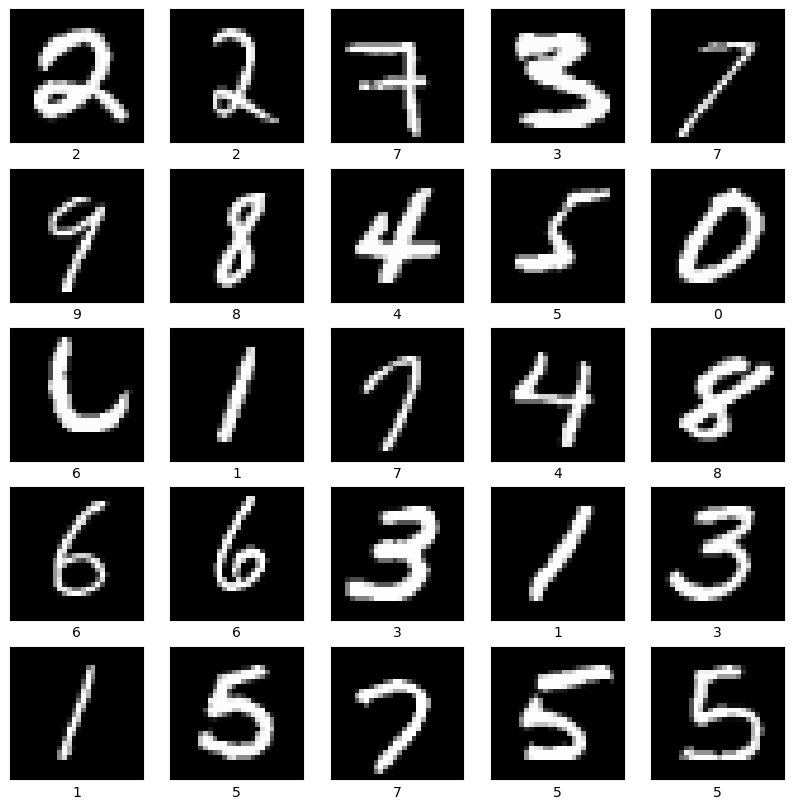

In [46]:
# Visualize the first 25 images from the training dataset
# Get a batch of training data
train_images, train_labels = next(iter(train_loader))

# Denormalize the images for visualization
train_images = train_images * 0.5 + 0.5

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines
    # Convert tensor to numpy array and remove channel dimension
    plt.imshow(train_images[i].numpy().squeeze(), cmap='gray')
    plt.xlabel(str(train_labels[i].item()))
plt.show()

*   Flatten: The primary purpose of the Flatten layer is to prepare the data for the fully connected (Dense) layers that follow. Dense layers require one-dimensional input, whereas the earlier layers in a CNN typically work with multi-dimensional feature maps. The Flatten layer bridges this gap by reshaping the data.
*   Dense: Dense layers are responsible for learning high-level features and making final predictions. They capture complex relationships between the features extracted by the earlier convolutional and pooling layers. The output of the Dense layer typically represents class scores or probabilities for various classes in classification tasks.

The Flatten layer doesn't introduce any new parameters. It reshapes the data without changing the number of parameters.The number of parameters in a Dense layer depends on two main factors:
1. The number of neurons (units) in the layer.
2. The number of input neurons from the previous layer.
- Parameters = (number of input neurons) * (number of neurons in the layer) + (number of neurons in the layer)


In [47]:
# Calculate n1 = 784*20 + 20
n1 = 784*20 + 20
print(n1)


15700


In [48]:
# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten the input image
        self.fc1 = nn.Linear(28*28, 20)  # First fully connected layer
        self.relu1 = nn.ReLU()  # ReLU activation
        self.fc2 = nn.Linear(20, 20)  # Second fully connected layer
        self.relu2 = nn.ReLU()  # ReLU activation
        self.fc3 = nn.Linear(20, 20)  # Third fully connected layer
        self.relu3 = nn.ReLU()  # ReLU activation
        self.fc4 = nn.Linear(20, 20)  # Fourth fully connected layer
        self.relu4 = nn.ReLU()  # ReLU activation
        self.fc5 = nn.Linear(20, 10)  # Output layer

    def forward(self, x):
        x = self.flatten(x)         # Flatten the input
        x = self.relu1(self.fc1(x))  # First layer + activation
        x = self.relu2(self.fc2(x))  # Second layer + activation
        x = self.relu3(self.fc3(x))  # Third layer + activation
        x = self.relu4(self.fc4(x))  # Fourth layer + activation
        x = self.fc5(x)               # Output layer
        return x

# Instantiate the model and move it to the selected device
model = NeuralNet().to(device)

# Print the model architecture
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=20, out_features=10, bias=True)
)


In [49]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [50]:
# Train the model
epochs = 10
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    # Print average loss for the epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.8638
Epoch 2/10, Loss: 0.4696
Epoch 3/10, Loss: 0.4055
Epoch 4/10, Loss: 0.3620
Epoch 5/10, Loss: 0.3378
Epoch 6/10, Loss: 0.3181
Epoch 7/10, Loss: 0.3075
Epoch 8/10, Loss: 0.2982
Epoch 9/10, Loss: 0.2918
Epoch 10/10, Loss: 0.2836


In [51]:
# Evaluate the model's accuracy on the test dataset
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9088


### Let's now build our first CNN

Convolutional layers are introduced in image classification tasks for several important reasons:

1. Feature Extraction: Convolutional layers are specifically designed to capture and extract spatial hierarchies of features in an image. They use convolution operations to detect various patterns, textures, and edges at different levels of abstraction. This hierarchical feature extraction is crucial for recognizing complex patterns in images.

2. Parameter Sharing: Convolutional layers share a small set of learnable parameters (kernels or filters) across the entire image, making them computationally efficient and capable of handling large images. This parameter sharing also enables the network to be invariant to translations, which is a desirable property for recognizing objects in different positions within an image.

3. Local Receptive Fields: Convolutional layers work on small, local regions of the input (receptive fields) and slide these receptive fields across the entire image. This local processing allows the network to focus on local details and gradually build up a representation of the entire image.

4. Reduced Spatial Dimensions: Convolutional layers often use pooling operations (e.g., max pooling) to reduce the spatial dimensions of the feature maps. This spatial reduction helps in reducing the computational load and also makes the network more robust to variations in object position and scale.

5. Hierarchical Representation: Convolutional neural networks (CNNs) typically consist of multiple convolutional layers stacked on top of each other. Each layer learns increasingly abstract and complex features, leading to a hierarchical representation of the input image. This hierarchical representation is beneficial for capturing intricate patterns and structures.

6. Translation Invariance: Convolutional layers provide translation-invariant representations. This means that the network can recognize patterns regardless of their exact position in the image. This property is particularly useful in image classification tasks where the position of an object in an image can vary.

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # (in_channels, out_channels, kernel_size)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)  # (kernel_size, stride)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(5 * 5 * 32, 10)  # Adjust based on input dimensions

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
# Instantiate and summarize the model
model = CNNModel()
print(model)
print(train_images.shape)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)
torch.Size([64, 1, 28, 28])


(None, 26, 26, 32) describes a 2D convolutional layer's output where:

- The batch size can vary (indicated by None).
- The output feature maps have a height of 26 pixels.
- The output feature maps have a width of 26 pixels.
- There are 32 feature maps (channels) in the output, each containing different feature information.

The number of parameters in a 2D convolutional layer depends on several factors:

1. Number of filters (also called kernels) in the layer.
2. Size of each filter (usually specified as a height and width).
3. Number of input channels (e.g., 3 for RGB images).

- Parameters = (filter height * filter width * number of input channels + 1) * number of filters


In [53]:
n2=(3 * 3 * 32 + 1) * 32
n2

9248

In [54]:
# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")


Epoch 1/3 - Loss: 0.2125 - Accuracy: 0.9378
Epoch 2/3 - Loss: 0.0701 - Accuracy: 0.9787
Epoch 3/3 - Loss: 0.0563 - Accuracy: 0.9827


In [55]:
# Evaluation
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_acc = correct / total
print(f'\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')



Test Loss: 0.0345, Test Accuracy: 0.9890


we have seen how we can boost our perfromance just by changing the type of network to CNN!

### Let's break down what we did !

In [56]:
# What is this?
print(train_images.shape)

torch.Size([64, 1, 28, 28])


In [57]:
import numpy as np
m = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]])
m.shape

(3, 4)

In [58]:
m.reshape(-1) #The -1 is a placeholder for an unknown dimension

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [59]:
m.reshape(-1, 2)


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

So this implies that **the row value is inferred from the length of the array and remaining dimensions**

In [60]:
#here we specify the input shape (28 pixels, 28 pixels, 1 channel (black/white (greyscale)))
print(train_images[0].shape)

torch.Size([1, 28, 28])


In [61]:
# We have 32 kernels (filters) with size 3 pixels by 3 pixles,  relu is applied right after the elemental-wise product
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)

![alt text](https://d2l.ai/_images/conv-pad.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html

In [62]:
# Pooling is not a real neural layer. It is an operation layer as show below
# You see that we are choosing a filter size of 2x2 pixels
pool = nn.MaxPool2d(kernel_size=2, stride=2)

![alt text](https://d2l.ai/_images/pooling.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/pooling.html

### Flatten layer
A flatten layer collapses the spatial dimensions of the input into the channel dimension

In [63]:
flatten = nn.Flatten()

In [64]:
print(model)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)


In [65]:
5*5*32

800

In [66]:
#randomly setting a fraction of the input units (neurons) to zero during each training step, prevents the network from relying too heavily on specific neurons and forces it to learn more robust and generalized features.
dropout = nn.Dropout(p=0.2)

![alt text](https://d2l.ai/_images/dropout2.svg "Title")
source: https://d2l.ai/chapter_multilayer-perceptrons/dropout.html

The method is called dropout because we literally drop out some neurons during training.


In [67]:
# Just another dense layer to do the classification!
fc = nn.Linear(in_features=13*13*32, out_features=10)
softmax = nn.Softmax(dim=1)

## Let's now train a more complex dataset and apply advanced options!

### Regularization

When addressing with overfitting, regularization is a typical approach.
To decrease the complexities of the trained models, it introduces a penalty function to the  loss function.

class L1: A regularizer that applies a L1 regularization penalty.

class L1L2: A regularizer that applies both L1 and L2 regularization penalties.

class L2: A regularizer that applies a L2 regularization penalty.

class Regularizer: Regularizer base class.

class l1: A regularizer that applies a L1 regularization penalty.

class l2: A regularizer that applies a L2 regularization penalty.

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for the training and testing data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5),  # Normalize the images to [-1, 1]
                         (0.5, 0.5, 0.5))
])

# Load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Define data loaders for training and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


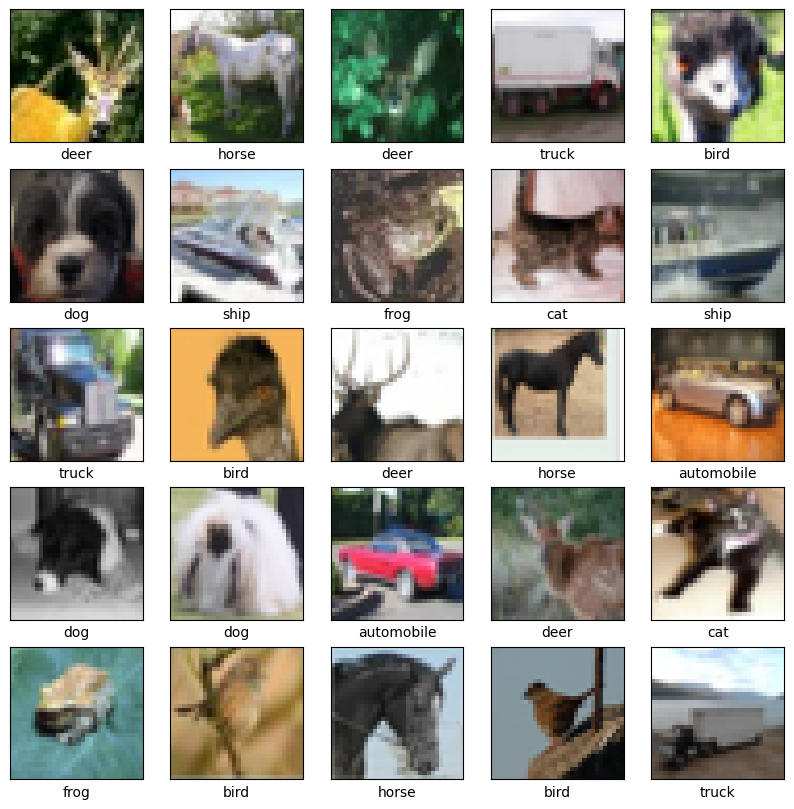

In [69]:
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image from [-1, 1] to [0, 1]
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display the images in a grid
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imshow(images[i].cpu()))
    plt.xlabel(class_names[labels[i]])
plt.show()

- Parameters = (filter height * filter width * number of input channels + 1) * number of filters

In [70]:
n=(3 * 3 * 3 + 1) * 16
n

448

In [71]:
# Define the Convolutional Neural Network (CNN) model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First convolutional layer: 16 filters, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer: 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Third convolutional layer: 64 filters, 3x3 kernel
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # Fully connected layer with L2 regularization (weight decay)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)  # Adjusted based on pooling
        self.fc2 = nn.Linear(64, 10)
        # Define activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply first convolutional layer followed by ReLU and pooling
        x = self.pool(self.relu(self.conv1(x)))
        # Apply second convolutional layer followed by ReLU and pooling
        x = self.pool(self.relu(self.conv2(x)))
        # Apply third convolutional layer followed by ReLU and pooling
        x = self.pool(self.relu(self.conv3(x)))
        # Flatten the tensor
        x = x.view(-1, 64 * 4 * 4)
        # Apply first fully connected layer with ReLU
        x = self.relu(self.fc1(x))
        # Apply second fully connected layer (output layer)
        x = self.fc2(x)
        return x

In [72]:
print(model)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)


In [87]:
# Instantiate the model and move it to the configured device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)  # L2 regularization


In [88]:
# 5. Training and Evaluation Functions
def train(model, loader, criterion, optimizer, device):
    """
    Train the model for one epoch.
    
    Parameters:
        model (nn.Module): The neural network model.
        loader (DataLoader): DataLoader for training data.
        criterion: Loss function.
        optimizer: Optimization algorithm.
        device: Device to run the training on.
    
    Returns:
        epoch_loss (float): Average loss for the epoch.
        epoch_acc (float): Accuracy for the epoch.
    """
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize
        
        running_loss += loss.item() * inputs.size(0)  # Accumulate loss
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion, device):
    """
    Evaluate the model on validation or test data.
    
    Parameters:
        model (nn.Module): The neural network model.
        loader (DataLoader): DataLoader for validation/test data.
        criterion: Loss function.
        device: Device to run the evaluation on.
    
    Returns:
        epoch_loss (float): Average loss for the epoch.
        epoch_acc (float): Accuracy for the epoch.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            
            running_loss += loss.item() * inputs.size(0)  # Accumulate loss
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc


In [89]:
def train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=20):
    """
    Train the model and evaluate on test data after each epoch.
    
    Parameters:
        model (nn.Module): The neural network model.
        train_loader (DataLoader): DataLoader for training data.
        test_loader (DataLoader): DataLoader for test data.
        criterion: Loss function.
        optimizer: Optimization algorithm.
        device: Device to run the training on.
        num_epochs (int): Number of training epochs.
    
    Returns:
        history (dict): Dictionary containing training and validation loss and accuracy.
    """
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, test_loader, criterion, device)
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs} | '
              f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | '
              f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')
    
    return history

history = train_model(net, trainloader, testloader, criterion, optimizer, device, num_epochs=20)

Epoch 1/20 | Train Loss: 1.5676 | Train Acc: 0.4287 | Val Loss: 1.3428 | Val Acc: 0.5108
Epoch 2/20 | Train Loss: 1.2185 | Train Acc: 0.5645 | Val Loss: 1.1504 | Val Acc: 0.5853
Epoch 3/20 | Train Loss: 1.0613 | Train Acc: 0.6236 | Val Loss: 1.0116 | Val Acc: 0.6460
Epoch 4/20 | Train Loss: 0.9568 | Train Acc: 0.6645 | Val Loss: 0.9764 | Val Acc: 0.6620
Epoch 5/20 | Train Loss: 0.8859 | Train Acc: 0.6916 | Val Loss: 0.8966 | Val Acc: 0.6913
Epoch 6/20 | Train Loss: 0.8249 | Train Acc: 0.7120 | Val Loss: 0.9309 | Val Acc: 0.6716
Epoch 7/20 | Train Loss: 0.7775 | Train Acc: 0.7301 | Val Loss: 0.8601 | Val Acc: 0.7016
Epoch 8/20 | Train Loss: 0.7442 | Train Acc: 0.7420 | Val Loss: 0.8255 | Val Acc: 0.7172
Epoch 9/20 | Train Loss: 0.7114 | Train Acc: 0.7521 | Val Loss: 0.8519 | Val Acc: 0.7052
Epoch 10/20 | Train Loss: 0.6809 | Train Acc: 0.7636 | Val Loss: 0.8455 | Val Acc: 0.7059
Epoch 11/20 | Train Loss: 0.6496 | Train Acc: 0.7742 | Val Loss: 0.8054 | Val Acc: 0.7273
Epoch 12/20 | Train

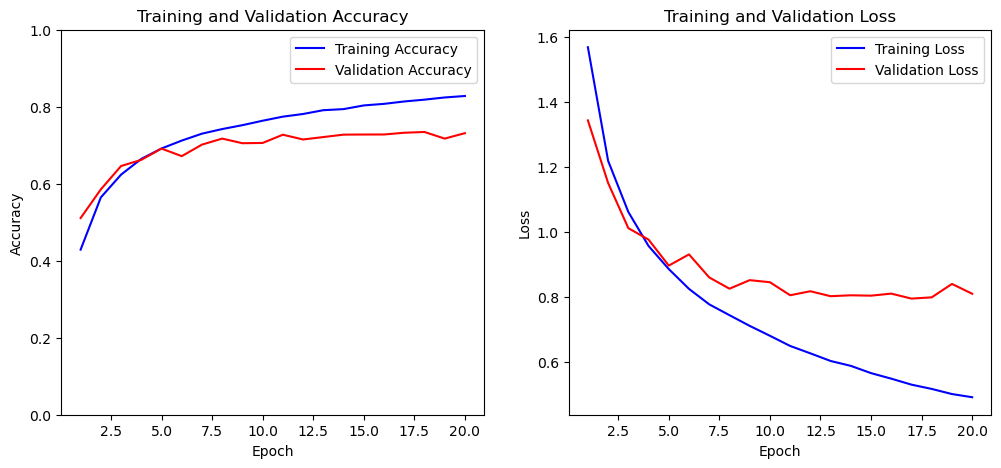

In [90]:
def plot_history(history):
    """
    Plot training and validation accuracy and loss over epochs.
    
    Parameters:
        history (dict): Dictionary containing training and validation loss and accuracy.
    """
    epochs = range(1, len(history['train_acc']) + 1)
    
    # Plot Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, history['train_acc'], 'b', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    
    # Plot Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, history['train_loss'], 'b', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot Training History
plot_history(history)

In [91]:
def test_evaluation(model, test_loader, criterion, device):
    """
    Evaluate the model on the test dataset and print results.
    
    Parameters:
        model (nn.Module): The neural network model.
        test_loader (DataLoader): DataLoader for test data.
        criterion: Loss function.
        device: Device to run the evaluation on.
    """
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    print(f'Final Test Loss: {test_loss:.4f} | Final Test Accuracy: {test_acc:.4f}')

# Final Evaluation
test_evaluation(net, testloader, criterion, device)


Final Test Loss: 0.8101 | Final Test Accuracy: 0.7313


### Let's do it without regularization

In [94]:
# Instantiate the model and move it to the configured device
net2 = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.001, weight_decay=0)  # w/o L2 regularization

history = train_model(net2, trainloader, testloader, criterion, optimizer, device, num_epochs=20)

Epoch 1/20 | Train Loss: 1.5640 | Train Acc: 0.4315 | Val Loss: 1.3103 | Val Acc: 0.5298
Epoch 2/20 | Train Loss: 1.1612 | Train Acc: 0.5889 | Val Loss: 1.0846 | Val Acc: 0.6116
Epoch 3/20 | Train Loss: 1.0015 | Train Acc: 0.6494 | Val Loss: 0.9940 | Val Acc: 0.6460
Epoch 4/20 | Train Loss: 0.9006 | Train Acc: 0.6855 | Val Loss: 0.9448 | Val Acc: 0.6760
Epoch 5/20 | Train Loss: 0.8247 | Train Acc: 0.7129 | Val Loss: 0.9125 | Val Acc: 0.6841
Epoch 6/20 | Train Loss: 0.7635 | Train Acc: 0.7371 | Val Loss: 0.8576 | Val Acc: 0.7038
Epoch 7/20 | Train Loss: 0.7175 | Train Acc: 0.7512 | Val Loss: 0.8424 | Val Acc: 0.7090
Epoch 8/20 | Train Loss: 0.6783 | Train Acc: 0.7623 | Val Loss: 0.8868 | Val Acc: 0.7047
Epoch 9/20 | Train Loss: 0.6404 | Train Acc: 0.7773 | Val Loss: 0.8384 | Val Acc: 0.7162
Epoch 10/20 | Train Loss: 0.6086 | Train Acc: 0.7885 | Val Loss: 0.8366 | Val Acc: 0.7215
Epoch 11/20 | Train Loss: 0.5809 | Train Acc: 0.7962 | Val Loss: 0.8556 | Val Acc: 0.7165
Epoch 12/20 | Train

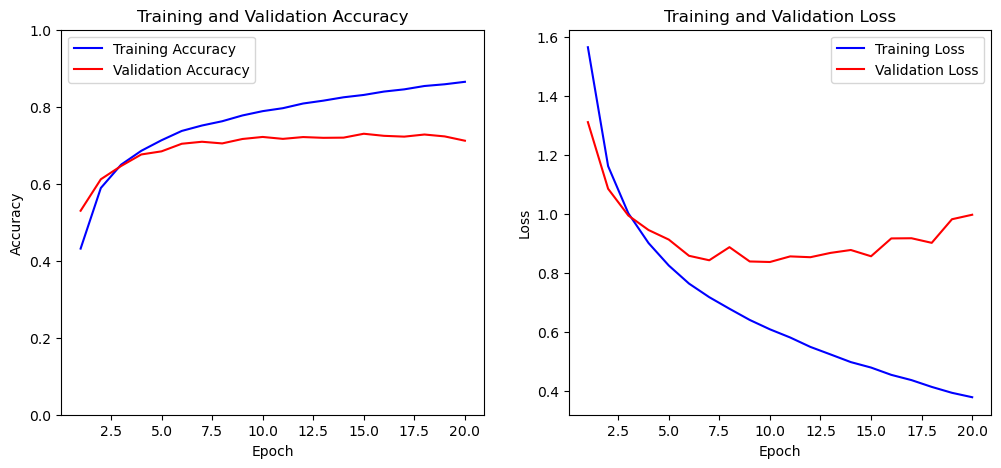

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ea4c8b70820>
Traceback (most recent call last):
  File "/home/ubuntu/data/anaconda3/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/data/anaconda3/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/home/ubuntu/data/anaconda3/envs/torch/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ea4c8b70820>
Traceback (most recent call last):
  File "/home/ubuntu/data/anaconda3/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/data/anacond

Final Test Loss: 0.9966 | Final Test Accuracy: 0.7117


In [95]:
# Plot Training History
plot_history(history)

# Final Evaluation
test_evaluation(net2, testloader, criterion, device)

## Data Augmentation

Data Augmentation involves applying random (but realistic) transformations to the training data to create new, varied samples. These transformations can include:

- Geometric transformations: Rotations, translations, flips, scaling, etc.
- Color space transformations: Adjusting brightness, contrast, saturation, etc.
- Noise injection: Adding random noise to images.

By augmenting the data, the model becomes more robust to variations and improves its ability to generalize to new, unseen data.

Benefits of Data Augmentation:
- Increases Dataset Size: Generates more training samples from existing data.
- Improves Generalization: Helps the model generalize better to new data.
- Reduces Overfitting: Prevents the model from memorizing the training data.

### Common Data Augmentation Techniques for Image Data
Here are some widely used data augmentation techniques, especially for image datasets like CIFAR-10:

- Random Horizontal Flip: Flips the image horizontally with a given probability.
- Random Crop: Randomly crops the image, often with padding to maintain size.
- Random Rotation: Rotates the image by a random degree within a specified range.
- Color Jitter: Randomly changes the brightness, contrast, saturation, and hue.
- Random Grayscale: Converts the image to grayscale with a given probability.
- Cutout: Randomly masks out square regions of the input during training.

### Implementing Data Augmentation in PyTorch
PyTorch provides the 'torchvision.transforms' module, which offers a suite of common transformations that can be composed to perform data augmentation.

In [96]:
import torchvision.transforms as transforms

# Define transformations for training data with data augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),    # Randomly crop images with padding
    transforms.ToTensor(),                    # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5),    # Normalize to [-1, 1]
                         (0.5, 0.5, 0.5))
])

# Define transformations for test data (no augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])


Explanation:
- RandomHorizontalFlip: Flips the image horizontally with a probability p=0.5.
- RandomCrop: Randomly crops the image to 32x32 pixels, padding the image by 4 pixels on each side before cropping.
- ToTensor: Converts the PIL Image or NumPy ndarray to a tensor.
- Normalize: Normalizes the tensor with mean (0.5, 0.5, 0.5) and standard deviation (0.5, 0.5, 0.5), scaling pixel values to [-1, 1].

In [97]:
# Load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

# Define data loaders for training and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


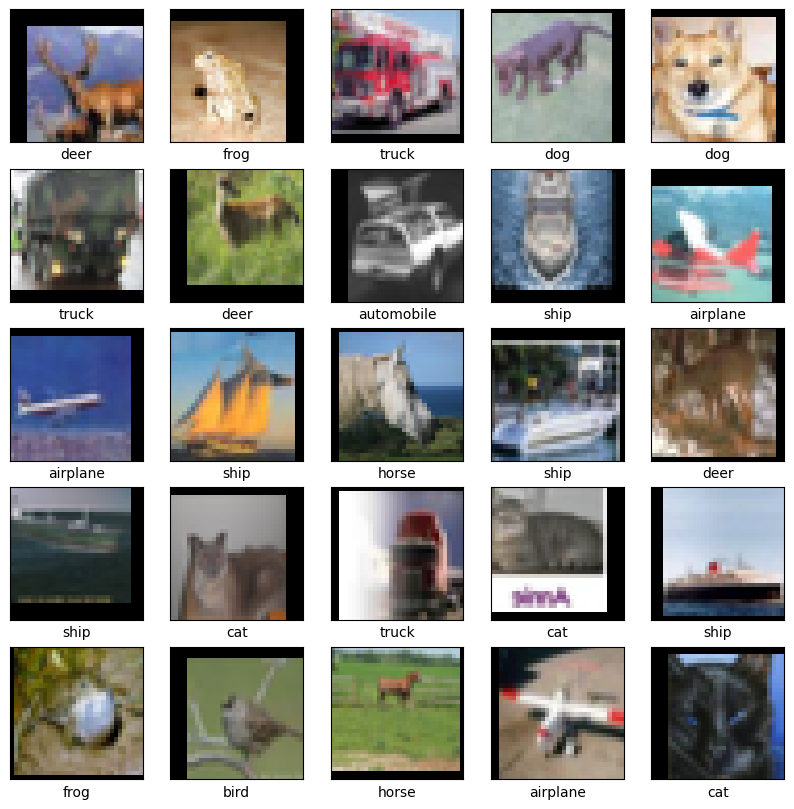

In [99]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display the images in a grid
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imshow(images[i].cpu()))
    plt.xlabel(class_names[labels[i]])
plt.show()

#### Training with Data Augmentation
Use the enhanced transform_train with data augmentation as defined earlier.

In [101]:
# Instantiate the model and move it to the configured device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)  # w/o L2 regularization

history = train_model(net, trainloader, testloader, criterion, optimizer, device, num_epochs=20)

Epoch 1/20 | Train Loss: 1.6937 | Train Acc: 0.3755 | Val Loss: 1.4398 | Val Acc: 0.4807
Epoch 2/20 | Train Loss: 1.4066 | Train Acc: 0.4887 | Val Loss: 1.2292 | Val Acc: 0.5558
Epoch 3/20 | Train Loss: 1.2870 | Train Acc: 0.5371 | Val Loss: 1.1682 | Val Acc: 0.5798
Epoch 4/20 | Train Loss: 1.1855 | Train Acc: 0.5760 | Val Loss: 1.0764 | Val Acc: 0.6153
Epoch 5/20 | Train Loss: 1.1112 | Train Acc: 0.6059 | Val Loss: 0.9909 | Val Acc: 0.6524
Epoch 6/20 | Train Loss: 1.0538 | Train Acc: 0.6263 | Val Loss: 0.9416 | Val Acc: 0.6698
Epoch 7/20 | Train Loss: 0.9968 | Train Acc: 0.6471 | Val Loss: 0.8985 | Val Acc: 0.6852
Epoch 8/20 | Train Loss: 0.9564 | Train Acc: 0.6626 | Val Loss: 0.8782 | Val Acc: 0.6941
Epoch 9/20 | Train Loss: 0.9216 | Train Acc: 0.6751 | Val Loss: 0.8448 | Val Acc: 0.7078
Epoch 10/20 | Train Loss: 0.8977 | Train Acc: 0.6829 | Val Loss: 0.8555 | Val Acc: 0.7032
Epoch 11/20 | Train Loss: 0.8719 | Train Acc: 0.6929 | Val Loss: 0.7969 | Val Acc: 0.7273
Epoch 12/20 | Train

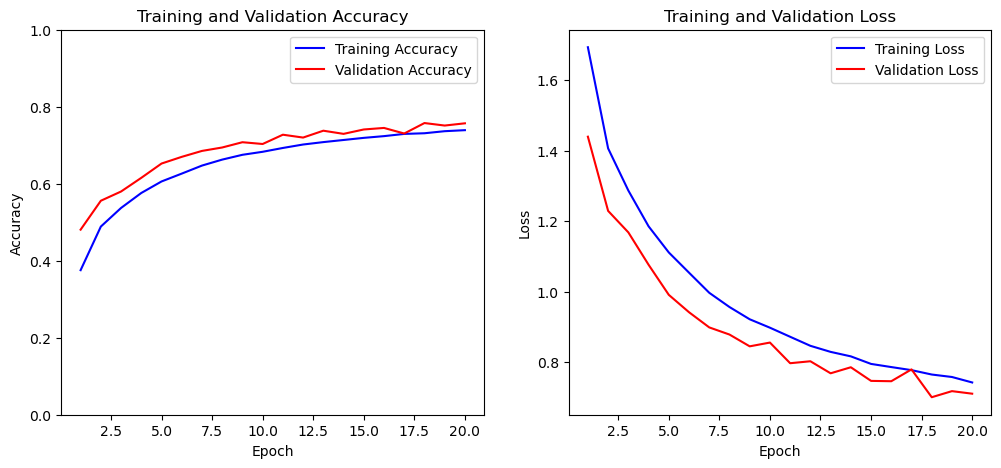

Final Test Loss: 0.7104 | Final Test Accuracy: 0.7569


In [105]:
# Plot Training History
plot_history(history)

# Final Evaluation
test_evaluation(net, testloader, criterion, device)

Typically, you should observe that the model trained with data augmentation performs better on the validation/test set, indicating improved generalization.



### Advanced Data Augmentation with torchvision.transforms

PyTorch's `torchvision.transforms` offers a wide array of augmentation techniques. Let's explore some advanced augmentations and how to implement them.

### a. Random Grayscale

Converts the image to grayscale with a given probability.

```python
transforms.RandomGrayscale(p=0.1)
```

### b. Random Affine Transformations

Applies random affine transformations like translation, scaling, rotation, and shearing.

```python
transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10)
```

### c. Cutout

Although not directly available in '''torchvision.transforms''', Cutout can be implemented using '''torchvision.transforms.RandomErasing'''.

```python
transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
```

### d.  Mixup and Cutmix
Advanced augmentations like Mixup and Cutmix involve combining multiple images and labels. Implementing these requires custom functions and are typically applied within the training loop.

> Note: Implementing Mixup and Cutmix is beyond the scope of this tutorial but can be explored for further enhancement.

### e.  Putting It All Together
Here's an example of a comprehensive data augmentation pipeline:

```python
# Define advanced transformations for training data
transform_train_advanced = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
])
```

### Customizing Data Augmentation

While `torchvision.transforms` provides a comprehensive set of pre-defined augmentation techniques, there are scenarios where you might need to implement custom augmentations tailored to your specific requirements. Custom augmentations can help introduce unique variations to your dataset, potentially enhancing the model's robustness and performance.

#### Why Customize Augmentation?

- **Specific Requirements**: Certain tasks may require transformations that are not available out-of-the-box.
- **Enhanced Diversity**: Custom augmentations can introduce novel variations, increasing the diversity of the training data.
- **Domain-Specific Enhancements**: For specialized domains (e.g., medical imaging), custom augmentations can simulate realistic artifacts or variations.

#### How to Implement Custom Augmentations in PyTorch

There are two primary ways to create custom augmentations in PyTorch:

1. **Using Callable Classes**
2. **Using Functions**

##### 1. Using Callable Classes

By subclassing `torch.nn.Module` or creating a simple callable class, you can define custom transformations.

**Example 1: Adding Random Gaussian Noise**

```python
import torch
import torchvision.transforms as transforms
import numpy as np

class AddGaussianNoise(object):
    """
    Adds Gaussian noise to a tensor.
    """
    def __init__(self, mean=0.0, std=0.1):
        """
        Args:
            mean (float): Mean of the Gaussian noise.
            std (float): Standard deviation of the Gaussian noise.
        """
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W).

        Returns:
            Tensor: Tensor image with added Gaussian noise.
        """
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return tensor + noise

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'
